# Анализ и прогнозирование рейтингов фильмов

Команда

- Асаналиева Алина
- Шастина Дарья

## Шаг 1: выбор темы

Мы думаем, что все любят смотреть фильмы. Довольно часто выбор фильма зависит от его рейтинга, поэтому мы решили проанализировать какие факторы могут повлиять на рейтинг: есть ли наиболее популярный жанр, влияет ли продолжительность или год выпуска фильма?

Также нам стало интересно, а можно ли благодаря этим характеристикам спрогнозировать будущий рейтинг фильмов. 

## Шаг 2: сбор данных

В качестве источника данных мы использовали сайт https://www.film.ru/. Изначально за основной источник мы хотели взять Кинопоиск, но их сайт довольно сложный для парсинга, и там меньше 1000 наблюдений, поэтому мы остановились на фильм.ру 

Было принято решение собрать максимальное количество признаков, с целью дальнейшего более детального их изучения.

Код парсера можно посмотреть [здесь](https://github.com/ALLLLLINA13/project_andan/blob/main/Парсер_фильмы.ipynb), итоговый файл с данными - [здесь](https://github.com/ALLLLLINA13/project_andan/blob/main/films.tsv).



## Шаг 3: Предварительныя обработка

### Какие данные были собраны

Мы взяли фильмы с сайта и для них мы собрали следующие характеристики : 

- Название
- Оценка Film.ru
- Оценка IMDb
- Оценка пользователей
- Год
- Жанр
- Страна
- время
- режиссер
- сценарий
- премьера
- бюджет
- сборы
- кинопрокат
- производство
- другие названия
- ссылки
- режиссеры

In [219]:
import pandas as pd 
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns

Посмотрим на полученный нами файл

In [220]:
df = pd.read_csv('films.tsv')
df.head()

,Название,Оценка Film.ru,Оценка IMDb,Оценка пользователей,Год,Жанр,Страна,время,режиссер,сценарий,премьера,бюджет,сборы,кинопрокат,производство,другие названия,ссылки,режиссеры,длительность
0,Побег из Шоушенка,10,9.3,6.8,1994,драма,США,1 час 48 минут,Фрэнк Дарабонт,Фрэнк Дарабонт,24.10.2019 (РФ),25000000 $,$28 341 469 (США),Иноекино,Castle Rock Entertainment,"Sueños de libertad, Die Verurteilten, Shoushen...",NaN,NaN,NaN
1,Криминальное чтиво,10,8.9,6.4,1994,драма,триллер,2 часа 34 минуты,Квентин Тарантино,Роджер Эйвери,29.09.1995 (РФ),8000000 $,$107 928 762 (США),Иноекино,"Miramax, A Band Apart, Jersey Films","Tiempos violentos, Kriminal Qirayet, Криминале...",Сайт фильма,NaN,NaN
2,Молчание ягнят,10,8.6,7.4,1991,драма,триллер,1 час 58 минут,Джонатан Демме,Тед Толли,16.09.2021 (РФ),19000000 $,$130 742 922 (США),Иноекино,"Strong Heart, Demme Production, Orion Pictures","Das Schweigen der Lдmmer, Il silenzio degli in...",NaN,NaN,NaN
3,Унесенные призраками,10,8.6,8.1,2001,мультфильмы,приключения,2 часа 5 минут,Хаяо Миядзаки,Хаяо Миядзаки,31.12.2002 (РФ),1900000000 $,$10 055 859 (США),Централ Партнершип,"Tokuma Shoten, Studio Ghibli, Nippon Televisio...","Spirited Away, Chihiros Reise ins Zauberland, ...",Официальный сайт (англ.),NaN,NaN
4,Назад в будущее,10,8.5,6.8,1985,комедия,приключения,1 час 48 минут,Роберт Земекис,Боб Гейл,10.12.2020 (РФ),19000000 $,$210 609 762 (США),Иноекино,"Universal Pictures, Amblin Entertainment, U-Dr...","Volver al futuro, Завръщане в бъдещето, De Vol...",NaN,NaN,NaN


Теперь определим количество пропусков в каждом из столбцов

In [221]:
df.isna().sum()

Название                   0
Оценка Film.ru             0
Оценка IMDb                0
Оценка пользователей       0
Год                        0
Жанр                       0
Страна                    12
время                     16
режиссер                 147
сценарий                  58
премьера                  18
бюджет                   946
сборы                    513
кинопрокат               311
производство              28
другие названия          165
ссылки                   862
режиссеры               1354
длительность            1498
dtype: int64

преобразуем переменные в числовой формат

In [226]:
df['Оценка IMDb'] = df['Оценка IMDb'].apply(float)
df['Оценка пользователей'] = df['Оценка пользователей'].apply(float)
df['Год'] = df['Год'].apply(float)

Удалим ненужные столбцы, так как в них много пропусков и смысловой нагрузки для нашего исследования в них нет

In [228]:
df.drop(['другие названия', 'ссылки', 'режиссеры', 'длительность'], axis=1, inplace=True)

Поменяем формат переменной Время, чтобы у нас длительность фильма была переведена в минуты

In [ ]:
df['время'].fillna('0', inplace=True)

for i in range(0, 1500):
    str = df.loc[i, 'время']
    minutes = 0
    str_list = str.split(' ')
    if (len(str_list) == 4):
        minutes += int(str_list[0]) * 60
        minutes += int(str_list[2])
    elif (len(str_list) == 2):
        minutes += int(str_list[0])

    df.loc[i, 'время'] = minutes

преобразуем переменную время в числовой формат

In [233]:
df['время'] = df['время'].apply(int)

Также мы решили удалить переменную Бюджет, так как в ней очень много пропусков

In [278]:
df.drop(['бюджет'], axis=1, inplace=True)

Поменяем формат переменной премьера

In [281]:
df['премьера'].fillna('0', inplace=True)

for i in range(1500):
    y = df['премьера'][i].split(' ')[0]
    df.loc[i, 'премьера'] = y

In [282]:
df.describe()

,Оценка Film.ru,Оценка IMDb,Оценка пользователей,Год,время
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,7.874000,6.952933,6.652333,2011.489333,111.467333
std,0.737441,1.416899,0.955599,9.691052,26.918767
min,7.000000,0.000000,0.000000,1939.000000,0.000000
25%,7.000000,6.800000,6.300000,2007.000000,97.000000
50%,8.000000,7.200000,6.800000,2013.500000,110.000000
75%,8.000000,7.600000,7.200000,2018.000000,125.250000
max,10.000000,9.400000,9.500000,2023.000000,290.000000


In [326]:
df.head()

,Название,Оценка Film.ru,Оценка IMDb,Оценка пользователей,Год,Жанр,Страна,время,режиссер,сценарий,премьера,сборы,кинопрокат,производство
0,Побег из Шоушенка,10,9.3,6.8,1994.0,драма,США,108,Фрэнк Дарабонт,Фрэнк Дарабонт,24.10.2019,$28 341 469 (США),Иноекино,Castle Rock Entertainment
1,Криминальное чтиво,10,8.9,6.4,1994.0,драма,триллер,154,Квентин Тарантино,Роджер Эйвери,29.09.1995,$107 928 762 (США),Иноекино,"Miramax, A Band Apart, Jersey Films"
2,Молчание ягнят,10,8.6,7.4,1991.0,драма,триллер,118,Джонатан Демме,Тед Толли,16.09.2021,$130 742 922 (США),Иноекино,"Strong Heart, Demme Production, Orion Pictures"
3,Унесенные призраками,10,8.6,8.1,2001.0,мультфильмы,приключения,125,Хаяо Миядзаки,Хаяо Миядзаки,31.12.2002,$10 055 859 (США),Централ Партнершип,"Tokuma Shoten, Studio Ghibli, Nippon Televisio..."
4,Назад в будущее,10,8.5,6.8,1985.0,комедия,приключения,108,Роберт Земекис,Боб Гейл,10.12.2020,$210 609 762 (США),Иноекино,"Universal Pictures, Amblin Entertainment, U-Dr..."


В итоге получили такую таблицу. Главной проблемой стало большое количество пропусков в переменной сборы, они составляют треть всех значений. Заполнять их средним или медианой не имело смысла, так как это значительно сместит выборку. Удалять данные строки мы тоже не хотели, так как их слишком много и они важны для анализа остальных показателей.

Поэтому основными показателями для анализа являются рейтинги, год выпуска, жанр и продолжительность фильма.

## Шаг 4. Визуализация

Построим гистограмму распределения годов выпуска фильмов

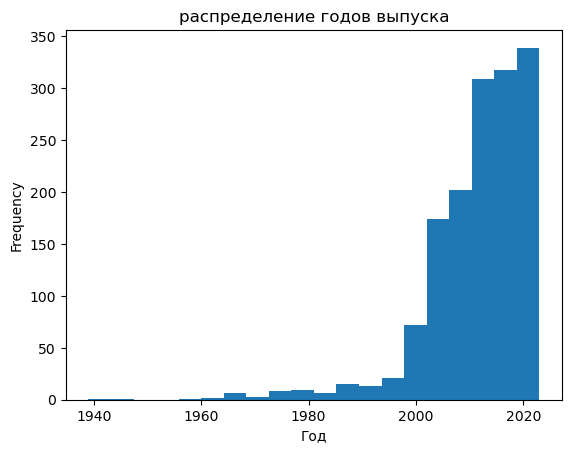

In [289]:
plt.hist(df['Год'], bins=20)
plt.xlabel('Год')
plt.ylabel('Frequency')
plt.title('распределение годов выпуска')
plt.show()

Большинство фильмов были выпущены после 2000

Построим гистограмму распределения длительности фильмов

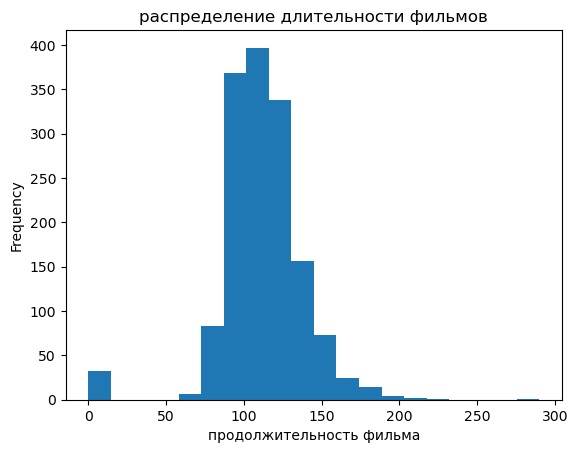

In [287]:
plt.hist(df['время'], bins=20)
plt.xlabel('продолжительность фильма')
plt.ylabel('Frequency')
plt.title('распределение длительности фильмов')
plt.show()

Большинство фильмов имеют длительность от 70 до 120 минут

Далее построим гистограммы для трех рейтингов и сравним, где оценка фильмов выше

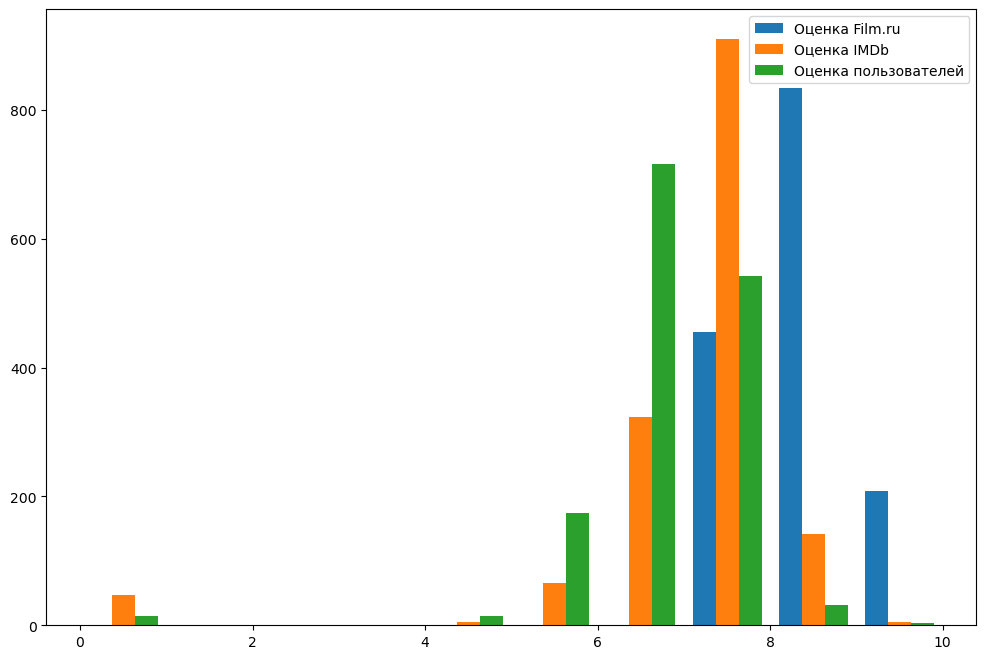

In [293]:
plt.figure(figsize=(12,8))
plt.hist([df['Оценка Film.ru'], df['Оценка IMDb'], df['Оценка пользователей']], label=['Оценка Film.ru', 'Оценка IMDb', 'Оценка пользователей'])

plt.legend()

Мы можем увидеть, что среди всех рейтингов самые низкие оценки фильмы имеют по оценке пользователей. Среди оценок Film.ru более часто встречаются высокие оценки.

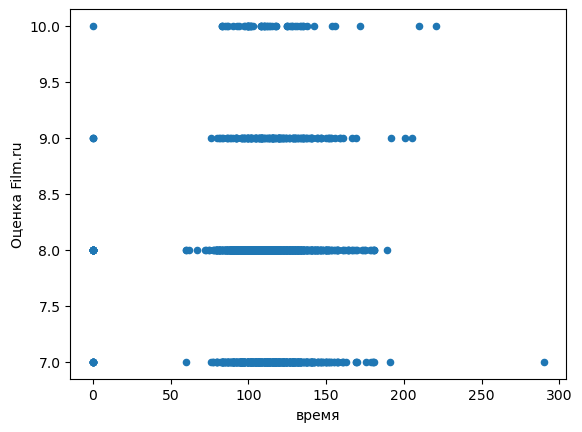

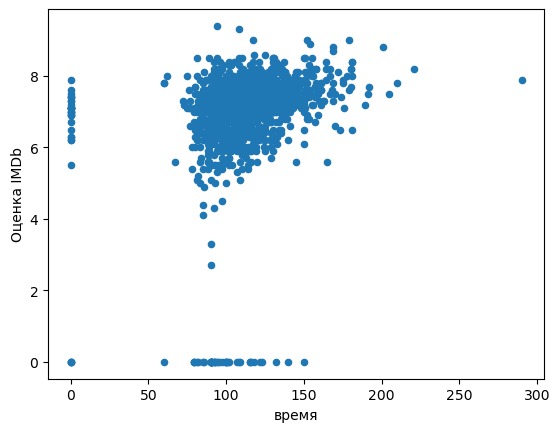

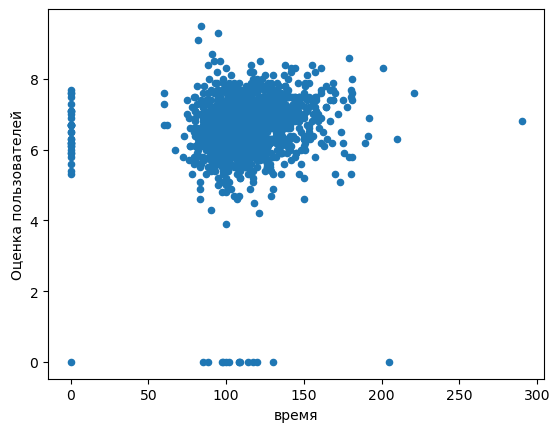

In [294]:
df.plot.scatter(x='время', y='Оценка Film.ru')
plt.show()

df.plot.scatter(x='время', y='Оценка IMDb')
plt.show()

df.plot.scatter(x='время', y='Оценка пользователей')
plt.show()

Сложно заметить какую-то связь между выбранными показателями. 

Посмотрим, какие жанры всречабтся наиболее часто

In [325]:
genres = df['Жанр'].value_counts()
genres

драма               625
боевик              210
биографический      152
мультфильмы         128
комедия             116
детектив            114
документальный       41
война                35
триллер              28
приключения          15
ужасы                 9
вестерн               9
мелодрама             8
фэнтези               3
короткометражный      2
фантастика            1
Россия                1
семейный              1
Великобритания        1
музыка                1
Name: Жанр, dtype: int64

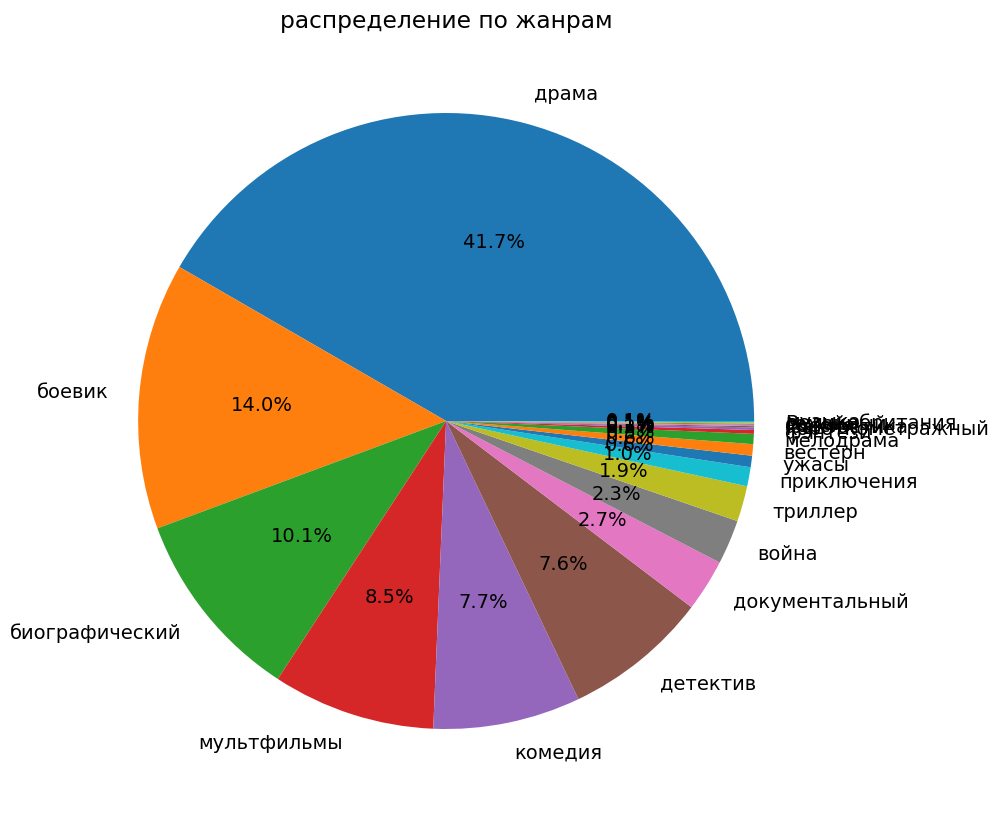

In [317]:
plt.figure(figsize=(10, 10))
plt.pie(genres, labels=genres.index, autopct='%1.1f%%')
plt.title('распределение по жанрам')
plt.show()

Наибольшее количество фильмов имеют жанр драма (41.7%), на втором месте находятся боевики (14.0%), после биографические фильмы (10.1%). Остальные жанры занимают меньше 10% каждый

Изучим зависимости между переменными. Для этого в первую очередь построим корреляционную матрицу

In [318]:
df.corr()

,Оценка Film.ru,Оценка IMDb,Оценка пользователей,Год,время
Оценка Film.ru,1.000000,-0.061417,-0.087764,-0.186835,0.010496
Оценка IMDb,-0.061417,1.000000,0.225162,-0.178853,0.251214
Оценка пользователей,-0.087764,0.225162,1.000000,-0.208308,0.123822
Год,-0.186835,-0.178853,-0.208308,1.000000,-0.096912
время,0.010496,0.251214,0.123822,-0.096912,1.000000


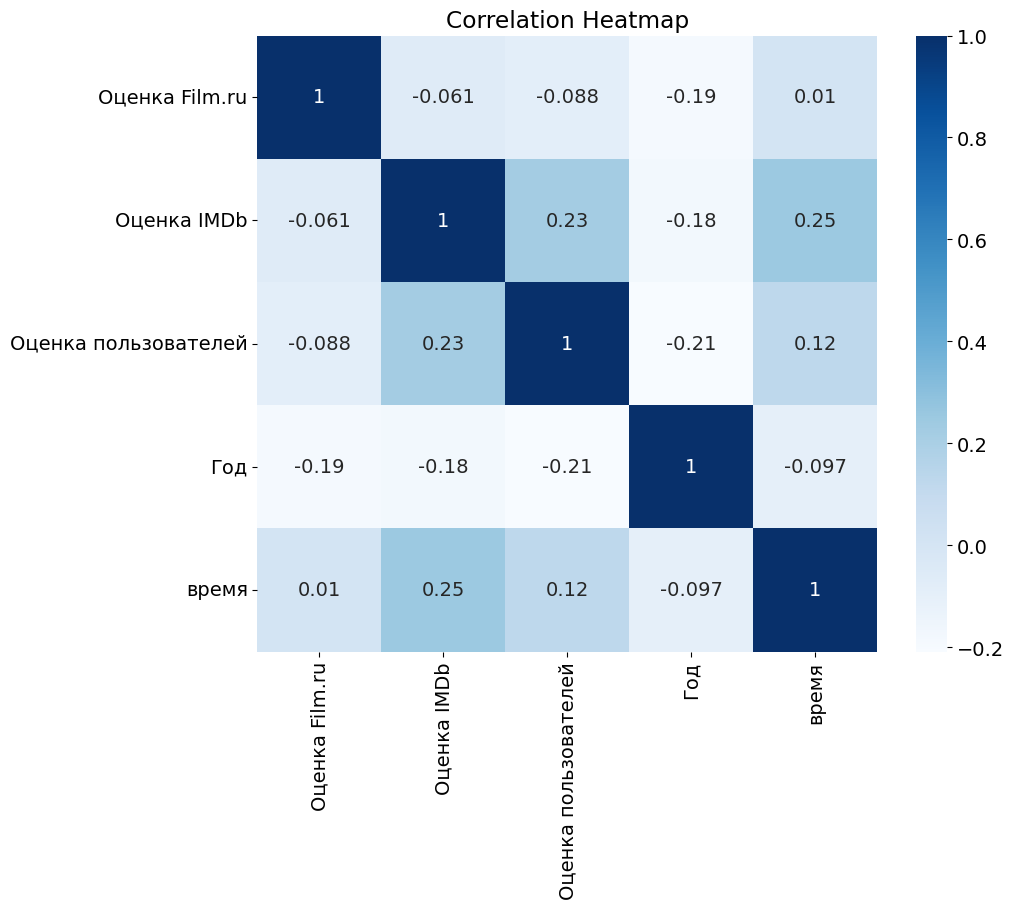

In [320]:
corr_matrix = df[['Оценка Film.ru', 'Оценка IMDb', 'Оценка пользователей', 'Год', 'время']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

Мы можем увидеть, что из всех признаков наибольшую корреляционную связь имеют время и оценка IMDb, между ними наблюдается положительная линейная связь

## Шаг 5. Создание новых признаков

В первую очередь можем создать такой признак, как средняя оценка, которая считается как среднее значение из имеющихся рейтингов

Также можно создать такие признаки, как сезонность. То есть посмотреть, в какое время года была премьера фильма, и после этого проверить различные гипотезы

К сожалению, наших знаний не хватило, чтобы реализовать это в питоне, но идеи у нас вполне есть. Поэтому простите, пожалуйста, по мы сделали все, что могли...